In [2]:
import cv2
import time
import matplotlib.pyplot as plt

from SimplePoseNet import SimplePoseNet
model = SimplePoseNet()
image_path = 'dataset/hrp/images/0001.jpg'

In [3]:
start_time = time.time()
result = model.predict(image_path)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.6553380489349365 seconds ---


In [4]:
result

[[array([428, 189]),
  array([426, 289]),
  array([394, 302]),
  array([437, 322]),
  array([413, 397]),
  array([439, 417])]]

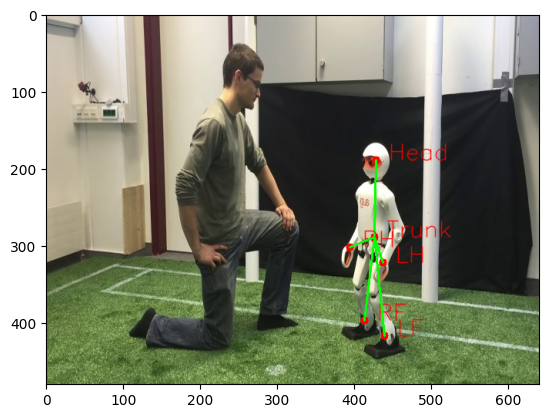

In [5]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )

for i in range(len(result)):
    start_point = None
    for j, kp in enumerate(result[i]):
        text = ''
        if j == 0: text = 'Head'
        elif j == 1: text = 'Trunk'
        elif j == 2: text = 'RH'
        elif j == 3: text = 'LH'
        elif j == 4: text = 'RF'
        elif j == 5: text = 'LF'
        
        image = cv2.circle(image, tuple(kp), 5, (255,0,0), -1)
        image = cv2.putText(image, " " + text, tuple(kp), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 1, cv2.LINE_AA)
        
        if start_point:
            image = cv2.line(image, start_point, tuple(kp), (0, 255, 0), 2)
        if j < 2:
            start_point = tuple(kp)
plt.imshow(image)